# CS210 Spring 2019 - Final Project

### Group Members:
##### Elif İpek Şahin
##### İlayda Ademoğlu
##### Zeynep Berksöz

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
import csv

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [4]:
from os.path import join
from pprint import pprint

In [5]:
d_path = "./data"
filename = "NYPD_Complaint_Data_Historic.csv"
filename2 = "nyc_census_tracts.csv"

df = pd.read_csv(join(d_path, filename))
census_df = pd.read_csv(join(d_path, filename2))

In [6]:
census_df.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [7]:
census_df.shape

(2167, 36)

In [8]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


# Project Description

At the end, to analyze our data we will look at relations of crimes and income levels. We will also try to find relationships between unemployement retes and crime rates, job description types and crime rates, and see if common prejudices about these are correct. We will also analyze the relationships between drugs and crimes.

In our research, we will try to find answers to these questions:

- Which category of crimes are most frequent?
- Is there a relation between crimes and people's income? 
- Is there a relation between crimes and employment status or type of profession?
- Is it possible to guess people's income according to some features?
- How many of the crimes are a result of drug usage?
- In which locations in New York, crime rates are frequent?
- By looking at the data of crimes related drugs, can we find a relation between certain drug kinds and crime specifications?
- What is the place of drug related crimes among all other crimes?

# Dataset

We obtained the dataset from Kaggle as csv file. This dataset includes the crimes in New York City between 2014-2015. This dataset has 25 attributes and 1048575 crime cases that are presented in the dataset. Most of the attributes are of object and float data types.

In [9]:
num_rows,num_cols = df.shape
print("Number of row: {}, Number of columns: {}".format(num_rows,num_cols))

Number of row: 1048575, Number of columns: 24


There are 1048575 crime cases.

In [10]:
df["OFNS_DESC"].unique().shape  #Getting unique crime count

(69,)

There are 69 unique crime types for example; dangereous drugs, forgery, assault...

In [11]:
df.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
PARKS_NM              object
HADEVELOPT            object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lat_Lon               object
dtype: object

In [12]:
census_df.dtypes

CensusTract          int64
County              object
Borough             object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap       float64
IncomePerCapErr    float64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
dtype: object

In [13]:
df.describe()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.048575e+06,1.048575e+06,1.047842e+06,1.048574e+06,1.016158e+06,1.016158e+06,1.016158e+06,1.016158e+06
mean,5.497027e+08,2.953382e+02,4.099135e+02,6.380729e+01,1.004983e+06,2.067818e+05,4.073420e+01,-7.392516e+01
std,2.598666e+08,1.505240e+02,2.192328e+02,3.434066e+01,2.146524e+04,3.043238e+04,8.353300e-02,7.741049e-02
min,1.000007e+08,1.010000e+02,1.010000e+02,1.000000e+00,9.133190e+05,1.210800e+05,4.049877e+01,-7.425508e+01
25%,3.244583e+08,1.170000e+02,2.540000e+02,4.000000e+01,9.919982e+05,1.839220e+05,4.067144e+01,-7.397206e+01
50%,5.494480e+08,3.410000e+02,3.570000e+02,6.600000e+01,1.004598e+06,2.053300e+05,4.073021e+01,-7.392661e+01
75%,7.746526e+08,3.510000e+02,6.370000e+02,9.400000e+01,1.016552e+06,2.348090e+05,4.081116e+01,-7.388336e+01
max,9.999996e+08,8.810000e+02,9.750000e+02,1.230000e+02,1.067226e+06,2.718200e+05,4.091272e+01,-7.370058e+01


In [14]:
census_df.describe()

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,2.167000e+03,2167.000000,2167.000000,2167.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2167.000000,...,2124.000000,2124.000000,2124.000000,2106.000000,2167.000000,2124.000000,2124.00000,2124.000000,2124.000000,2125.000000
mean,3.605476e+10,3888.667743,1852.812183,2035.855561,26.624671,33.055827,23.950799,0.198590,13.442622,2436.468389,...,9.048070,2.306921,3.749105,40.831576,1813.498385,79.536205,14.19355,6.151271,0.118644,9.757788
std,2.594875e+07,2240.050968,1063.921420,1212.765249,22.662106,30.421463,29.476758,0.700418,16.446275,1538.399585,...,9.623892,2.872501,4.560174,7.105916,1180.593180,6.923979,7.23155,3.851846,0.391563,5.786948
min,3.600500e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.200000,0.000000,38.600000,0.00000,0.000000,0.000000,0.000000
25%,3.604703e+10,2359.500000,1113.000000,1224.500000,9.000000,4.100000,1.500000,0.000000,2.100000,1446.000000,...,3.300000,0.500000,1.300000,37.200000,1052.500000,75.000000,8.80000,3.500000,0.000000,5.900000
50%,3.604712e+10,3550.000000,1699.000000,1848.000000,18.400000,22.950000,7.800000,0.000000,6.700000,2140.000000,...,6.500000,1.500000,2.800000,41.400000,1579.000000,79.900000,13.30000,5.600000,0.000000,8.800000
75%,3.608103e+10,4957.500000,2360.500000,2571.500000,39.900000,60.100000,39.075000,0.000000,18.925000,2976.000000,...,10.800000,3.200000,5.100000,45.375000,2273.500000,84.400000,18.70000,8.200000,0.000000,12.600000
max,3.608599e+10,28926.000000,13460.000000,15466.000000,100.000000,100.000000,100.000000,11.300000,89.800000,22905.000000,...,100.000000,55.600000,100.000000,70.500000,12780.000000,100.000000,53.70000,61.400000,3.900000,100.000000


# Preprocessing

We will deal with NaN values and determine how many of them are exist in each attribute. We will check if there exist any column to be added

In [15]:
df.isnull().sum() #NaN counts in each column

CMPLNT_NUM                 0
CMPLNT_FR_DT              65
CMPLNT_FR_TM               0
CMPLNT_TO_DT          205959
CMPLNT_TO_TM          205573
RPT_DT                     0
KY_CD                      0
OFNS_DESC               2880
PD_CD                    733
PD_DESC                  733
CRM_ATPT_CPTD_CD           1
LAW_CAT_CD                 0
JURIS_DESC                 0
BORO_NM                    0
ADDR_PCT_CD                1
LOC_OF_OCCUR_DESC     217752
PREM_TYP_DESC           4689
PARKS_NM             1040976
HADEVELOPT            996803
X_COORD_CD             32417
Y_COORD_CD             32417
Latitude               32417
Longitude              32417
Lat_Lon                32417
dtype: int64

In [16]:
ratio_num = df.isnull().sum() / num_rows
ratio_num

CMPLNT_NUM           0.000000e+00
CMPLNT_FR_DT         6.198889e-05
CMPLNT_FR_TM         0.000000e+00
CMPLNT_TO_DT         1.964180e-01
CMPLNT_TO_TM         1.960499e-01
RPT_DT               0.000000e+00
KY_CD                0.000000e+00
OFNS_DESC            2.746585e-03
PD_CD                6.990439e-04
PD_DESC              6.990439e-04
CRM_ATPT_CPTD_CD     9.536752e-07
LAW_CAT_CD           0.000000e+00
JURIS_DESC           0.000000e+00
BORO_NM              0.000000e+00
ADDR_PCT_CD          9.536752e-07
LOC_OF_OCCUR_DESC    2.076647e-01
PREM_TYP_DESC        4.471783e-03
PARKS_NM             9.927530e-01
HADEVELOPT           9.506263e-01
X_COORD_CD           3.091529e-02
Y_COORD_CD           3.091529e-02
Latitude             3.091529e-02
Longitude            3.091529e-02
Lat_Lon              3.091529e-02
dtype: float64

In [17]:
census_df.isnull().sum()

CensusTract         0
County              0
Borough             0
TotalPop            0
Men                 0
Women               0
Hispanic           39
White              39
Black              39
Native             39
Asian              39
Citizen             0
Income             66
IncomeErr          66
IncomePerCap       46
IncomePerCapErr    46
Poverty            42
ChildPoverty       60
Professional       43
Service            43
Office             43
Construction       43
Production         43
Drive              43
Carpool            43
Transit            43
Walk               43
OtherTransp        43
WorkAtHome         43
MeanCommute        61
Employed            0
PrivateWork        43
PublicWork         43
SelfEmployed       43
FamilyWork         43
Unemployment       42
dtype: int64

In [18]:
index2drop = census_df[census_df["IncomePerCap"].isnull()].index
census_df.drop(index2drop,inplace = True)

In [19]:
index2drop = census_df[census_df["Income"].isnull()].index
census_df.drop(index2drop,inplace = True)

None of the columns are completely empty, so there is no need to remove any columns from data.

Parks_nm an hadevelopt columns numbers are nearly empty and their ratios are very close to 1.
For example;  
PARKS_NM  9.927530e-01
HADEVELOPT           9.506263e-01


In [20]:
#Drop unnecessary columns
df.drop(["PARKS_NM","HADEVELOPT", "CMPLNT_NUM", "KY_CD", "PD_CD", "CRM_ATPT_CPTD_CD", "LAW_CAT_CD", "JURIS_DESC",
        "ADDR_PCT_CD", "LOC_OF_OCCUR_DESC", "PREM_TYP_DESC", "X_COORD_CD", "Y_COORD_CD", "Lat_Lon"],axis = 1 , inplace = True)

In [21]:
df.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_DESC,BORO_NM,Latitude,Longitude
0,12/31/2015,23:45:00,NaN,NaN,12/31/2015,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",BRONX,40.828848,-73.916661
1,12/31/2015,23:36:00,NaN,NaN,12/31/2015,MURDER & NON-NEGL. MANSLAUGHTER,NaN,QUEENS,40.697338,-73.784557
2,12/31/2015,23:30:00,NaN,NaN,12/31/2015,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",MANHATTAN,40.802607,-73.945052
3,12/31/2015,23:30:00,NaN,NaN,12/31/2015,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,QUEENS,40.654549,-73.726339
4,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MANHATTAN,40.738002,-73.987891


We saved the initial table in df2, and in df we eliminated all NaN values from Latitude and Longtitude in order to visualize our data.

In [22]:
index2drop = df[df["Latitude"].isnull()].index
df.drop(index2drop,inplace = True)

In [23]:
index2drop = df[df["Longitude"].isnull()].index
df.drop(index2drop,inplace = True)

#     Data Exploration

Distribution of Income per Cap

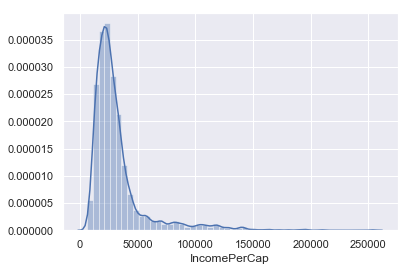

In [24]:
sns.distplot(census_df["IncomePerCap"].astype(int), norm_hist=True)

Distribution of Income

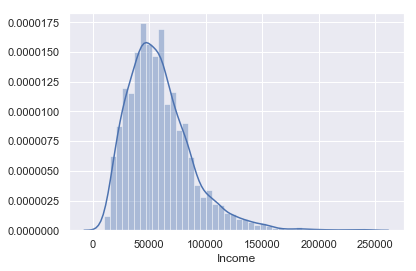

In [25]:
sns.distplot(census_df["Income"].astype(int), norm_hist=True)

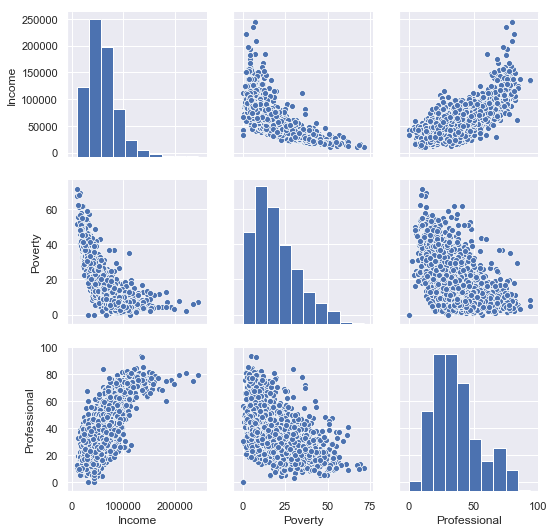

In [26]:
cols2plot = ["Income", "Poverty", "Professional"]
sns.pairplot(data=census_df, vars=cols2plot, palette = "rainbow")

plt.show()

Crime frequencies by districts in NYC. It can be concluded that Brooklyn has the highest crime rates.

In [27]:
df['BORO_NM'].value_counts()

BROOKLYN         308786
MANHATTAN        237833
BRONX            220109
QUEENS           202029
STATEN ISLAND     47401
Name: BORO_NM, dtype: int64

This is the 20 most commonc crimes in NYC 

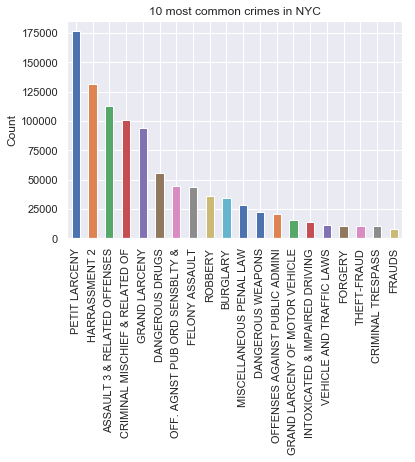

In [28]:
#20 most common crimes in NYC, by year

df['OFNS_DESC'].value_counts()[:20].plot.bar()
plt.ylabel('Count')
plt.title('10 most common crimes in NYC')
plt.show()

 The most common crime is Petit Larceny and the second most common is harrasment

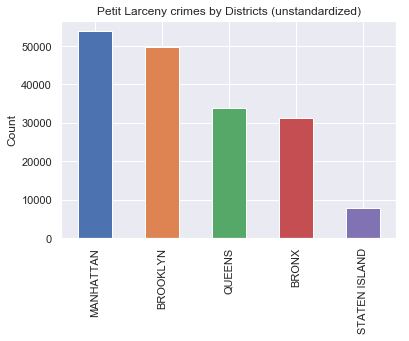

In [29]:
"""Petit Larceny crimes by boro in 2014-2015 destributed by districts of NYC(unstandardized)"""

Boro_Crime = df.copy()
Boro_Crime = Boro_Crime[Boro_Crime['OFNS_DESC']=='PETIT LARCENY']

Boro_Crime['BORO_NM'].value_counts().plot.bar()

plt.ylabel('Count')
plt.title('Petit Larceny crimes by Districts (unstandardized)')
plt.show()

del(Boro_Crime)

The dangereous drug crimes distributed by districts of NYC

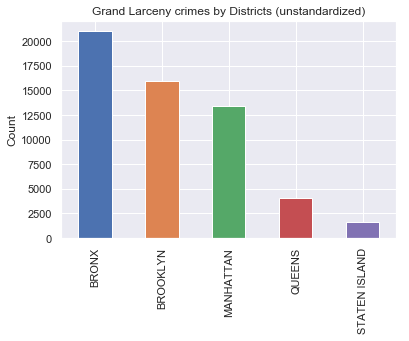

In [30]:
#Dangereous Drug crimes by boro in 2014-2015 destributed by districts of NYC(unstandardized)

Boro_Crime = df.copy()
Boro_Crime = Boro_Crime[Boro_Crime['OFNS_DESC']=='DANGEROUS DRUGS']

Boro_Crime['BORO_NM'].value_counts().plot.bar()

plt.ylabel('Count')
plt.title('Grand Larceny crimes by Districts (unstandardized)')
plt.show()

del(Boro_Crime)

In [31]:
drug_extracted = df.loc[df["OFNS_DESC"] == "DANGEROUS DRUGS"]
drug_extracted.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_DESC,BORO_NM,Latitude,Longitude
2,12/31/2015,23:30:00,NaN,NaN,12/31/2015,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",MANHATTAN,40.802607,-73.945052
6,12/31/2015,23:15:00,NaN,NaN,12/31/2015,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, POSSESSI",MANHATTAN,40.720200,-73.988735
20,12/31/2015,22:53:00,12/31/2015,22:55:00,12/31/2015,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, POSSESSI",BROOKLYN,40.655642,-73.959863
22,12/31/2015,22:50:00,12/31/2015,22:57:00,12/31/2015,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, POSSESSI",QUEENS,40.749307,-73.897578
28,12/31/2015,22:40:00,12/31/2015,22:50:00,12/31/2015,DANGEROUS DRUGS,"MARIJUANA, POSSESSION 4 & 5",BROOKLYN,40.696494,-73.949431


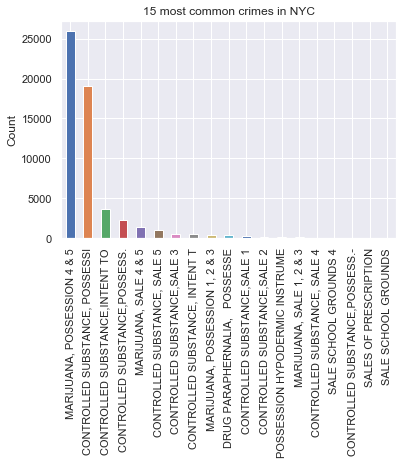

In [32]:
#15 most common crimes related with drugs in NYC, by year

drug_extracted['PD_DESC'].value_counts()[:20].plot.bar()
plt.ylabel('Count')
plt.title('15 most common crimes in NYC')
plt.show()

In [33]:
drug_extracted['PD_DESC'].value_counts()

MARIJUANA, POSSESSION 4 & 5       25983
CONTROLLED SUBSTANCE, POSSESSI    19104
CONTROLLED SUBSTANCE,INTENT TO     3640
CONTROLLED SUBSTANCE,POSSESS.      2311
MARIJUANA, SALE 4 & 5              1415
CONTROLLED SUBSTANCE, SALE 5        959
CONTROLLED SUBSTANCE,SALE 3         561
CONTROLLED SUBSTANCE, INTENT T      552
MARIJUANA, POSSESSION 1, 2 & 3      398
DRUG PARAPHERNALIA,   POSSESSE      381
CONTROLLED SUBSTANCE,SALE 1         286
CONTROLLED SUBSTANCE,SALE 2         112
POSSESSION HYPODERMIC INSTRUME      112
MARIJUANA, SALE 1, 2 & 3            110
CONTROLLED SUBSTANCE, SALE 4         49
SALE SCHOOL GROUNDS 4                47
CONTROLLED SUBSTANCE,POSSESS.-       15
SALES OF PRESCRIPTION                 5
SALE SCHOOL GROUNDS                   2
Name: PD_DESC, dtype: int64

In [34]:
drug_extracted['BORO_NM'].value_counts().sort_index()

BRONX            21028
BROOKLYN         15930
MANHATTAN        13377
QUEENS            4082
STATEN ISLAND     1625
Name: BORO_NM, dtype: int64

We eliminated the rows which are related with dangereous drugs because we're going to create graphs for comparison

In [35]:
drug_extractedwithout = df.loc[df["OFNS_DESC"] != "DANGEROUS DRUGS"]
drug_extractedwithout.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_DESC,BORO_NM,Latitude,Longitude
0,12/31/2015,23:45:00,NaN,NaN,12/31/2015,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",BRONX,40.828848,-73.916661
1,12/31/2015,23:36:00,NaN,NaN,12/31/2015,MURDER & NON-NEGL. MANSLAUGHTER,NaN,QUEENS,40.697338,-73.784557
3,12/31/2015,23:30:00,NaN,NaN,12/31/2015,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,QUEENS,40.654549,-73.726339
4,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MANHATTAN,40.738002,-73.987891
5,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",BROOKLYN,40.665023,-73.957111


In [36]:
drug_extractedwithout['BORO_NM'].value_counts().sort_index()

BRONX            199081
BROOKLYN         292856
MANHATTAN        224456
QUEENS           197947
STATEN ISLAND     45776
Name: BORO_NM, dtype: int64

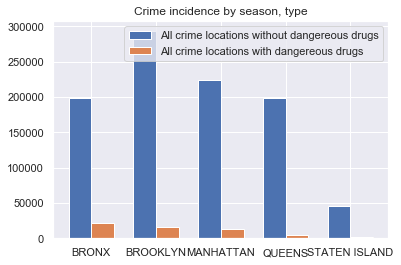

In [37]:
index = np.arange(5)
bar_width = 0.35

fig, ax = plt.subplots()
a1 = ax.bar(index, drug_extractedwithout["BORO_NM"].value_counts().sort_index(), bar_width,
                label="All crime locations without dangereous drugs")

a2 = ax.bar(index+bar_width, drug_extracted["BORO_NM"].value_counts().sort_index(),
                 bar_width, label="All crime locations with dangereous drugs")

ax.set_title('Crime incidence by season, type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"])



ax.legend()

plt.show()

Delete rows that contain NULL "CMPLNT_FR_DT" values. We will add a new column called "day", and for this we need to convert CMPLNT_FR_DT objects into time-date objects.

In [38]:
index2drop = df[df["CMPLNT_FR_DT"].isnull()].index
df.drop(index2drop,inplace = True)

In [39]:
import datetime
df2 = df.copy()
def eliminate_nonsense_dates(x):
    if x[2] > '2050':
        x = None
    elif x[2] < '2010':
        x = None
    else:
        aa= '/'.join(x)
        return (aa)

df2['CMPLNT_FR_DT'] = df2['CMPLNT_FR_DT'].str.split("/") #create a list for each value
df2['CMPLNT_FR_DT'] = df2['CMPLNT_FR_DT'].apply(lambda x: eliminate_nonsense_dates(x))

df2['Date_OCCRD'] = df2['CMPLNT_FR_DT'] +' '+df2['CMPLNT_FR_TM'] #Combing date and time columns
df2['Date_OCCRD'] = pd.to_datetime(df2['Date_OCCRD'])

df2.head()
del(df)

In [40]:
df2["day"] = df2["Date_OCCRD"].dt.weekday
index2drop = df2[df2["Date_OCCRD"].isnull()].index
df2.drop(index2drop,inplace = True)

In [41]:
df2["day"] = df2["day"].astype(int)
# we don't need these columns anymore, and we need space
df2.drop(["CMPLNT_FR_DT", "CMPLNT_FR_TM", "CMPLNT_TO_DT", "CMPLNT_TO_TM", "RPT_DT"],axis = 1 , inplace = True)
df2.head()

,OFNS_DESC,PD_DESC,BORO_NM,Latitude,Longitude,Date_OCCRD,day
0,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",BRONX,40.828848,-73.916661,2015-12-31 23:45:00,3
1,MURDER & NON-NEGL. MANSLAUGHTER,NaN,QUEENS,40.697338,-73.784557,2015-12-31 23:36:00,3
2,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",MANHATTAN,40.802607,-73.945052,2015-12-31 23:30:00,3
3,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,QUEENS,40.654549,-73.726339,2015-12-31 23:30:00,3
4,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MANHATTAN,40.738002,-73.987891,2015-12-31 23:25:00,3


### Extracting Some Insights

#### How does time of day affect the crime rates?

Below plot shows how the time is distributed.

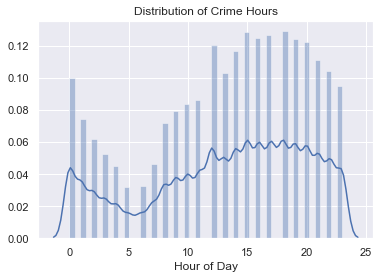

In [42]:
sns.distplot(df2["Date_OCCRD"].dt.hour, norm_hist=True)

plt.xlabel("Hour of Day")
plt.title("Distribution of Crime Hours")
plt.show()

## Hypothesis Testing

#### How does time of day affect the drug crime rates?

Our null hypothesis is that the day of week has no affect on whether or not a crime is a drug crime.

In [43]:
drug_extractedwithout = df2.loc[df2["OFNS_DESC"] != "DANGEROUS DRUGS"]
drug_extracted = df2.loc[df2["OFNS_DESC"] == "DANGEROUS DRUGS"]

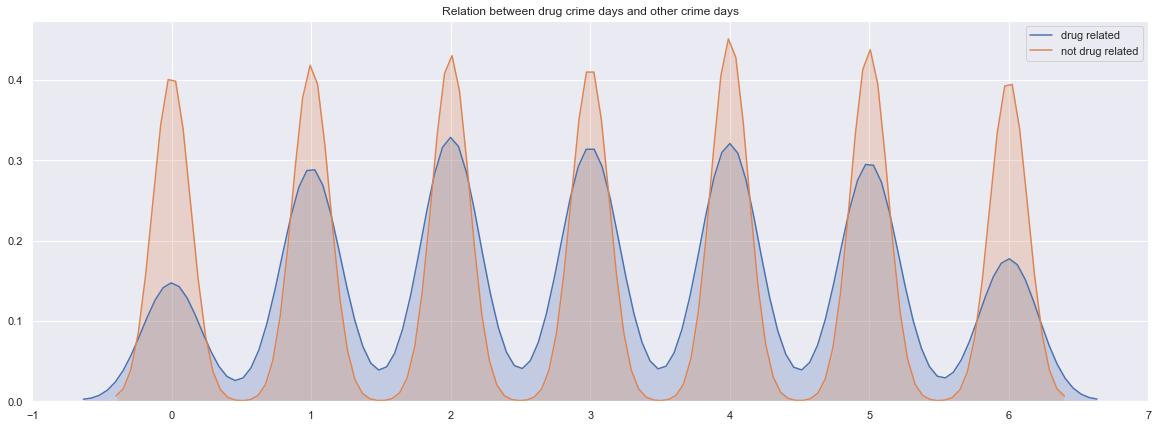

In [44]:
fig,ax = plt.subplots(1,1,figsize = (20,7))
ax = sns.kdeplot(drug_extracted["day"].rename("drug related"), shade=True)
sns.kdeplot(drug_extractedwithout["day"].rename("not drug related"), ax=ax, shade=True)
plt.title("Relation between drug crime days and other crime days")

plt.xlim([-1, 7])
plt.show()

In [45]:
drugsvalues = drug_extracted["day"].values
notdrugsvalues = drug_extractedwithout["day"].values

_, p_value = stats.ttest_ind(a=drugsvalues, b=notdrugsvalues, equal_var=False)
p_value

1.9095462343838612e-06

In [46]:
drugsvalues.mean()

3.050714680847267

In [47]:
notdrugsvalues.mean()

3.013730885893868

We can see that p-value is smaller than 0.05. Our value is 1.9e-06. Therefore we can conclude that the null hypothesis has failed. Also, the difference between means are not significant. Which means that we can not say the day of week has no affect on the crime being drug related or not.

#### How does day of month affect the drug crime rates?

Our null hypothesis is that the day of month has no affect on whether or not a crime is a drug crime.

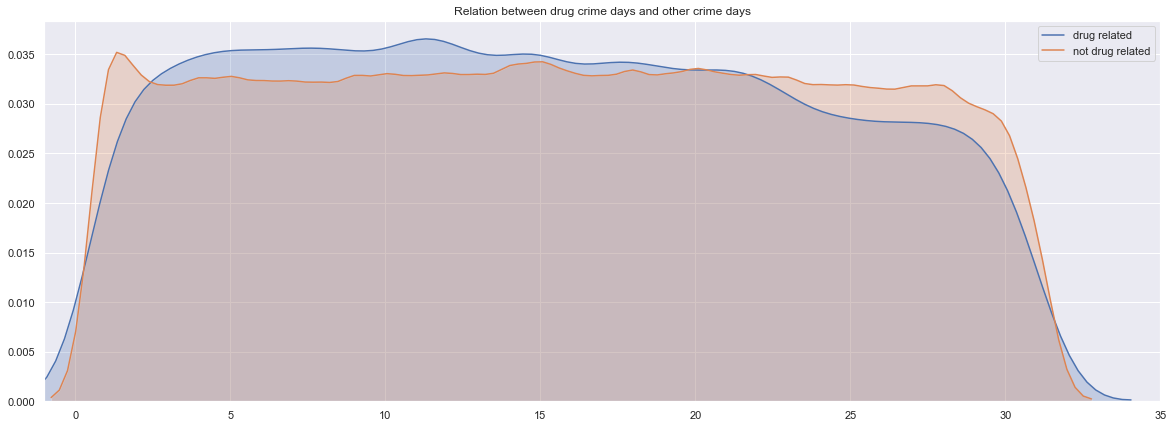

In [48]:
fig,ax = plt.subplots(1,1,figsize = (20,7))
ax = sns.kdeplot(drug_extracted["Date_OCCRD"].dt.day.rename("drug related"), shade=True)
sns.kdeplot(drug_extractedwithout["Date_OCCRD"].dt.day.rename("not drug related"), ax=ax, shade=True)
plt.title("Relation between drug crime days and other crime days")

plt.xlim([-1, 35])
plt.show()

In [49]:
drugsvalues = drug_extracted["Date_OCCRD"].dt.day.values
notdrugsvalues = drug_extractedwithout["Date_OCCRD"].dt.day.values

_, p_value = stats.ttest_ind(a=drugsvalues, b=notdrugsvalues, equal_var=False)
p_value

2.641521522055945e-34

In [50]:
drugsvalues.mean()

15.11502703474366

In [51]:
notdrugsvalues.mean()

15.57052336429115

We can see that p-value is much smaller than 0.05. Our value is 2.64e-34. Therefore we can conclude that the null hypothesis has failed. Also, the difference between means are not significant. Which means that we can say the day of month has an affect on the crime being drug related or not.

#### How does month of year affect the drug crime rates?

Our null hypothesis is that the hour of day has no affect on whether the crime being drug related or not.

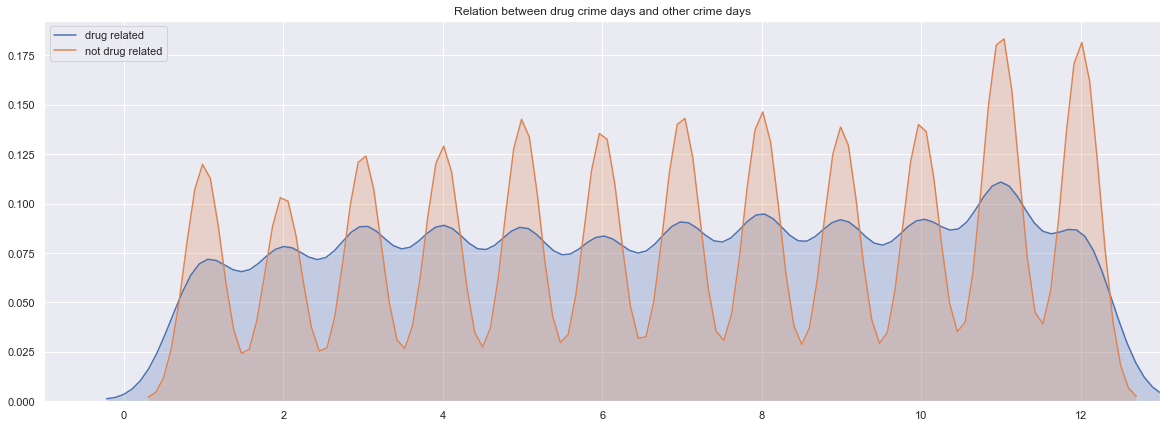

In [52]:
fig,ax = plt.subplots(1,1,figsize = (20,7))
ax = sns.kdeplot(drug_extracted["Date_OCCRD"].dt.month.rename("drug related"), shade=True)
sns.kdeplot(drug_extractedwithout["Date_OCCRD"].dt.month.rename("not drug related"), ax=ax, shade=True)
plt.title("Relation between drug crime days and other crime days")

plt.xlim([-1, 13])
plt.show()

In [53]:
drugsvalues = drug_extracted["Date_OCCRD"].dt.month.values
notdrugsvalues = drug_extractedwithout["Date_OCCRD"].dt.month.values


_, p_value = stats.ttest_ind(a=drugsvalues, b=notdrugsvalues, equal_var=False)
p_value

1.0475513665256868e-51

In [54]:
del(drug_extracted)
del(drug_extractedwithout)
del(drugsvalues)
del(notdrugsvalues)

#### Merge datas for the next hypothesis

In [55]:
df2.head()

,OFNS_DESC,PD_DESC,BORO_NM,Latitude,Longitude,Date_OCCRD,day
0,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",BRONX,40.828848,-73.916661,2015-12-31 23:45:00,3
1,MURDER & NON-NEGL. MANSLAUGHTER,NaN,QUEENS,40.697338,-73.784557,2015-12-31 23:36:00,3
2,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",MANHATTAN,40.802607,-73.945052,2015-12-31 23:30:00,3
3,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,QUEENS,40.654549,-73.726339,2015-12-31 23:30:00,3
4,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MANHATTAN,40.738002,-73.987891,2015-12-31 23:25:00,3


In [56]:
freq_boro = pd.DataFrame(df2["BORO_NM"].value_counts()/len(df2.index))
freq_boro.rename(columns = {"BORO_NM":"freq_boro"}, inplace = True)
freq_boro = freq_boro.reset_index()
freq_boro

,index,freq_boro
0,BROOKLYN,0.303857
1,MANHATTAN,0.234074
2,BRONX,0.216623
3,QUEENS,0.198815
4,STATEN ISLAND,0.046630


For this part, and for linear regression, we need to merge the two datasets.

In [57]:
from sklearn.linear_model import LinearRegression

import warnings 
warnings.simplefilter('ignore')

%matplotlib inline

In [58]:
census_df["Borough"] = census_df["Borough"].astype(str)
census_df["Borough"] = census_df["Borough"].str.upper()
census_df.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1,36005000200,Bronx,BRONX,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,BRONX,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,BRONX,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,BRONX,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2
5,36005002000,Bronx,BRONX,8516,3301,5215,61.1,1.6,31.1,0.3,...,4.3,1.0,0.0,46.0,2508,71.0,21.3,7.7,0.0,17.2


In [59]:
def assign_crime(row):
    if row == 'BROOKLYN':
        return 0.303857
    elif row == 'MANHATTAN':
        return 0.234074
    elif row == 'BRONX':
        return 0.216623
    elif row == 'QUEENS':
        return 0.198815
    elif row == 'STATEN ISLAND':
        return 0.046630

census_df['freq_boro'] = census_df['Borough'].apply(lambda row: assign_crime(row))
census_df.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,freq_boro
1,36005000200,Bronx,BRONX,5403,2659,2744,75.8,2.3,16.0,0.0,...,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7,0.216623
2,36005000400,Bronx,BRONX,5915,2896,3019,62.7,3.6,30.7,0.0,...,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5,0.216623
3,36005001600,Bronx,BRONX,5879,2558,3321,65.1,1.6,32.4,0.0,...,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7,0.216623
4,36005001900,Bronx,BRONX,2591,1206,1385,55.4,9.0,29.0,0.0,...,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2,0.216623
5,36005002000,Bronx,BRONX,8516,3301,5215,61.1,1.6,31.1,0.3,...,1.0,0.0,46.0,2508,71.0,21.3,7.7,0.0,17.2,0.216623


#### How does income level affect crime rates based on borough?

Our null hypothesis is that the income level has no affect on crime rates. For this, we set a threshold of income level:

In [60]:
threshold = census_df["Income"].mean()

In [61]:
larger_than_threshold = census_df[census_df["Income" ] >= threshold]
smaller_than_threshold = census_df[census_df["Income" ] < threshold]

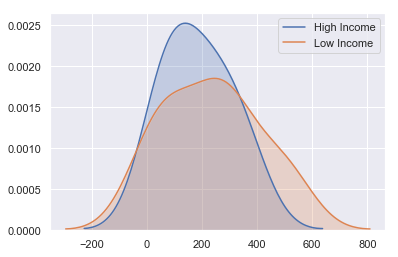

In [62]:
ax = sns.kdeplot(larger_than_threshold["Borough"].value_counts().rename("High Income"), shade=True)
sns.kdeplot(smaller_than_threshold["Borough"].value_counts().rename("Low Income"), ax=ax, shade=True)

In [63]:
highincome = larger_than_threshold["Borough"].value_counts()
lowincome = smaller_than_threshold["Borough"].value_counts()

_, p_value = stats.ttest_ind(a=highincome, b=lowincome, equal_var=False)
p_value

0.6200707775350018

Our p-value is 0.61. Which is larger than 0.05. We can conclude that out hypothesis is correct. Income level has no affect on crime rates.

#### Is there a relationship between crime rates and unemployment rates?

Our null hypothesis is that unemployment rates has no affect on crime rates. For this, we set a threshold for unemployment rates.

In [64]:
threshold = census_df["Unemployment"].mean()

In [65]:
larger_than_threshold = census_df[census_df["Unemployment"] >= threshold]
smaller_than_threshold = census_df[census_df["Unemployment"] < threshold]

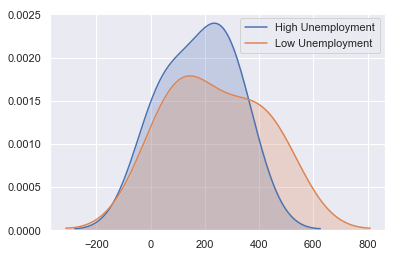

In [66]:
ax = sns.kdeplot(larger_than_threshold["Borough"].value_counts().rename("High Unemployment"), shade=True)
sns.kdeplot(smaller_than_threshold["Borough"].value_counts().rename("Low Unemployment"), ax=ax, shade=True)

In [67]:
highunemployment = larger_than_threshold["Borough"].value_counts()
lowunemployment = smaller_than_threshold["Borough"].value_counts()

_, p_value = stats.ttest_ind(a=highunemployment, b=lowunemployment, equal_var=False)
p_value

0.5409129203555005

We can again see that our p-value is larger than 0.05. Therefore we can say that our hypothesis is correct. Unemployment rates has no affect on crime rates.

#### Does job type (being employed in management, business, science, arts, and service jobs) has any affect on crime rates?

Our first hypothesis for this is that being a professional has no affect on crime rates. We set a threshold for this.

In [68]:
threshold = census_df["Professional"].mean()

In [69]:
larger_than_threshold = census_df[census_df["Professional"] >= threshold]
smaller_than_threshold = census_df[census_df["Professional"] < threshold]

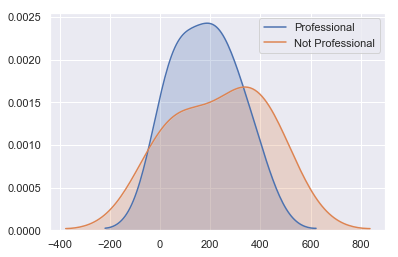

In [70]:
ax = sns.kdeplot(larger_than_threshold["Borough"].value_counts().rename("Professional"), shade=True)
sns.kdeplot(smaller_than_threshold["Borough"].value_counts().rename("Not Professional"), ax=ax, shade=True)

In [71]:
professional = larger_than_threshold["Borough"].value_counts()
notprofessional = smaller_than_threshold["Borough"].value_counts()

_, p_value = stats.ttest_ind(a=professional, b=notprofessional, equal_var=False)
p_value

0.5856340290173976

We can again conclude that our null hypothesis is correct. Professional rates has no affect on crime rates.

Our second hypothesis is that service job rates has no affect on crime rates.

In [72]:
threshold = census_df["Service"].mean()

In [73]:
larger_than_threshold = census_df[census_df["Service"] >= threshold]
smaller_than_threshold = census_df[census_df["Service"] < threshold]

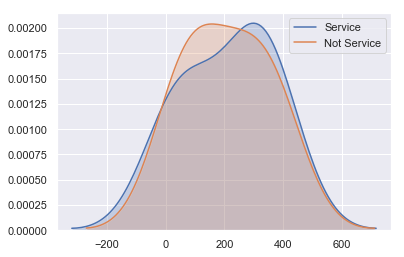

In [74]:
ax = sns.kdeplot(larger_than_threshold["Borough"].value_counts().rename("Service"), shade=True)
sns.kdeplot(smaller_than_threshold["Borough"].value_counts().rename("Not Service"), ax=ax, shade=True)

In [75]:
service = larger_than_threshold["Borough"].value_counts()
notservice = smaller_than_threshold["Borough"].value_counts()

_, p_value = stats.ttest_ind(a=service, b=notservice, equal_var=False)
p_value

0.9619418389154597

Again, our p-value is larger than 0.05. Therefore we accept our null hypothesis. There is no affect of service employement rates and crime rates.

## Linear Regression

Here is a correlation matrix:

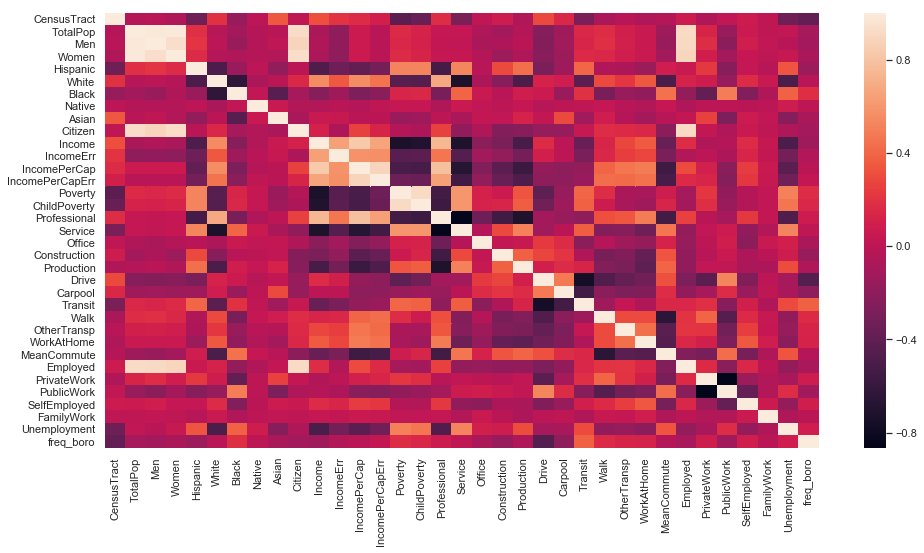

In [76]:
# calculate the correlation matrix
corr = census_df.corr()

plt.figure(figsize = (16,8))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Discard some of the feautures, and discard non-numeric columns.

In [77]:
census_df.dtypes

CensusTract          int64
County              object
Borough             object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap       float64
IncomePerCapErr    float64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
freq_boro          float64
d

In [78]:
census_df.drop(["CensusTract", "County","Borough"],axis = 1 , inplace = True)  #dropping unnecessary location information

In [79]:
census_df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,freq_boro
1,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,3639,72034.0,...,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7,0.216623
2,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,4100,74836.0,...,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5,0.216623
3,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,3536,32312.0,...,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7,0.216623
4,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,1557,37936.0,...,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2,0.216623
5,8516,3301,5215,61.1,1.6,31.1,0.3,3.3,5436,18086.0,...,1.0,0.0,46.0,2508,71.0,21.3,7.7,0.0,17.2,0.216623


In [80]:
census_df = census_df.fillna(method = "ffill")

We will try to predict income level using the other columns in census_df

In [152]:
target = census_df["Income"]                        #target is income
features = census_df.drop(["Income"],axis = 1)      #features are the attributes other than the income

In [153]:
from sklearn import linear_model
model = linear_model.LinearRegression()

###Instead of train test split we will use cross-validation (Stratified K-Fold), beacuse our dataset is really small.

In [155]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model = linear_model.LinearRegression()         # create a model that returns coef_ 

rfecv = RFECV(estimator=model,       # the model we have
              step=1,                # number of features to remove at each step
              cv=StratifiedKFold(), # cross-validation type
              scoring='r2')    # evaluation method

rfecv.fit(features, target)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring='r2', step=1, verbose=0)

In [156]:
model.fit(features,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
model.coef_

array([ 1.58802982e+00,  3.69817746e+00, -2.11014765e+00, -2.15118395e+02,
       -2.76378509e+02, -2.31651297e+02, -4.45744648e+02, -2.50776654e+02,
       -4.46377570e+00,  4.71393321e-01,  9.51053189e-01, -1.30922602e+00,
       -5.71958595e+02,  4.73788472e+01, -1.01211933e+03, -1.33705965e+03,
       -1.31801035e+03, -1.23031173e+03, -1.27890789e+03,  2.65842092e+03,
        2.50727303e+03,  2.38669697e+03,  2.38122091e+03,  2.12866519e+03,
        2.67604547e+03,  9.31249455e+01,  6.13396948e-01, -8.32040217e+02,
       -8.10528429e+02, -8.96208989e+02, -5.18935123e+02, -2.15884385e+01,
        2.14991418e+03])

In [158]:
for index, col_name in enumerate(features.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[index]))

The coefficient for TotalPop is 1.5880298184095873
The coefficient for Men is 3.698177460162572
The coefficient for Women is -2.110147653147371
The coefficient for Hispanic is -215.11839469515905
The coefficient for White is -276.37850854674235
The coefficient for Black is -231.65129653519068
The coefficient for Native is -445.7446480397958
The coefficient for Asian is -250.7766544770946
The coefficient for Citizen is -4.463775701978594
The coefficient for IncomeErr is 0.4713933210909006
The coefficient for IncomePerCap is 0.9510531886374707
The coefficient for IncomePerCapErr is -1.3092260193415086
The coefficient for Poverty is -571.9585954247794
The coefficient for ChildPoverty is 47.378847203421685
The coefficient for Professional is -1012.1193338770875
The coefficient for Service is -1337.0596546609636
The coefficient for Office is -1318.010352637215
The coefficient for Construction is -1230.3117335774039
The coefficient for Production is -1278.9078879357096
The coefficient for Dr

In [163]:
model.score(features, target)   #accuracy of this model/r^2

0.878660433707007

Accuracy of the linear regression model is high, which means our prediciton of income level is really close to the real values.

In [160]:
from sklearn.metrics import mean_squared_error

y_predict = model.predict(features)

lr_mse = mean_squared_error(y_predict, target)

print(lr_mse)   #mean squared error of the model

100614590.7638951


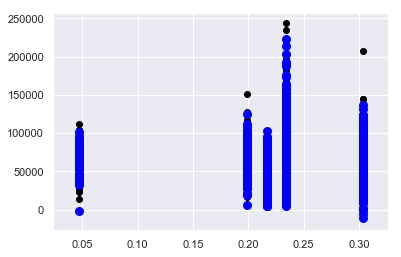

In [161]:
plt.scatter(features["freq_boro"], target, color='black')
plt.scatter(features["freq_boro"], y_predict, color='blue', linewidth=3)

Our regression model predicts with mean squared error 100614590.7638951, and r^2 0.87. The graph looks like it is seperated into 5 x values, but this is expected because we have 5 Boroughs. We tried to add more location information to our census_df through census tract infos, and to our main dataframe through coordinates, but we couldn't merge them. 

## Machine Learning Techniques

#### Selecting Best-K Attributes

In [89]:
features = census_df.drop(["Income"], axis=1).values
target = census_df["Income"].values

In [90]:
from sklearn.feature_selection import SelectKBest  # selection method
from sklearn.feature_selection import f_classif    # univariate test

In [91]:
selector = SelectKBest(f_classif, k=5)  # test method and number of attributes
selected_attr = selector.fit_transform(features, target)

array([[2.2180e+04, 2.2060e+03, 2.0000e+01, 2.0700e+01, 2.9000e+00],
       [2.7700e+04, 2.4490e+03, 1.3200e+01, 2.3600e+01, 1.4000e+00],
       [1.7526e+04, 2.9450e+03, 2.6300e+01, 3.5900e+01, 8.6000e+00],
       ...,
       [1.2753e+04, 2.4390e+03, 3.9300e+01, 5.1400e+01, 9.5000e+00],
       [1.6303e+04, 2.8180e+03, 4.1200e+01, 5.3800e+01, 5.0000e-01],
       [3.4261e+04, 1.0543e+04, 2.0500e+01, 1.6500e+01, 4.9000e+00]])

### Model-Based Feature Selection

Since we want to predict income level, using other features in our dataset; we decided to choose regression models; logistic regression and decision-tree.

Model 1: Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [99]:
model = LogisticRegression()         # create a model that returns coef_ 

rfecv = RFECV(estimator=model,       # the model we have
              step=1,                # number of features to remove at each step
              cv=StratifiedKFold(n_splits = 5), # cross-validation type
              scoring='accuracy')    # evaluation method

rfecv.fit(features, target)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [100]:
rfecv.n_features_  # number of features

16

In [101]:
rfecv.ranking_  # Selected features are assigned rank 1.

array([15, 10, 12,  5,  1,  1,  8,  1, 13, 17, 18, 16,  1,  4,  6,  1,  1,
        1,  1,  3,  1,  7,  1,  1,  1,  1, 11,  2,  1,  1,  9,  1, 14])

In [102]:
rfecv.support_  # the mask of selected features

array([False, False, False, False,  True,  True, False,  True, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False,  True,  True, False,  True, False])

In [103]:
f_df = census_df.drop(["Income"], axis=1)
census_df[f_df.columns[rfecv.support_]].head()  # resulting features from RFE

,White,Black,Asian,Poverty,Service,Office,Construction,Production,Carpool,Walk,OtherTransp,WorkAtHome,MeanCommute,PublicWork,SelfEmployed,Unemployment
1,2.3,16.0,4.2,20.0,17.1,23.9,8.0,22.3,13.7,2.9,0.0,0.0,43.0,16.2,2.9,7.7
2,3.6,30.7,0.3,13.2,23.4,24.9,9.0,10.5,10.0,1.4,0.5,2.1,45.0,25.3,2.5,9.5
3,1.6,32.4,0.0,26.3,36.1,26.2,4.9,13.8,5.3,8.6,1.6,1.7,38.8,21.3,3.8,8.7
4,9.0,29.0,2.1,37.1,20.9,26.2,6.6,11.0,5.3,3.0,2.4,6.2,45.4,15.5,7.7,19.2
5,1.6,31.1,3.3,53.2,41.1,16.7,7.1,20.6,7.0,4.3,1.0,0.0,46.0,21.3,7.7,17.2


Model 2: Decision Tree

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

In [178]:
model = DecisionTreeClassifier()
model.fit(features, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [184]:
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier(random_state = 42)
rf.fit(features, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [185]:
model.feature_importances_  # resulting feature importances

array([0.03422662, 0.03428739, 0.03164795, 0.02546481, 0.02875099,
       0.02920362, 0.0171437 , 0.03330579, 0.03415551, 0.03634322,
       0.02885746, 0.03122345, 0.0385715 , 0.03325259, 0.03211601,
       0.03335752, 0.03686365, 0.03202522, 0.0294465 , 0.02795912,
       0.03387354, 0.0364502 , 0.02952643, 0.03157971, 0.03333497,
       0.02582137, 0.0364989 , 0.01952477, 0.0322553 , 0.0304098 ,
       0.01249361, 0.03002781, 0.02000098])

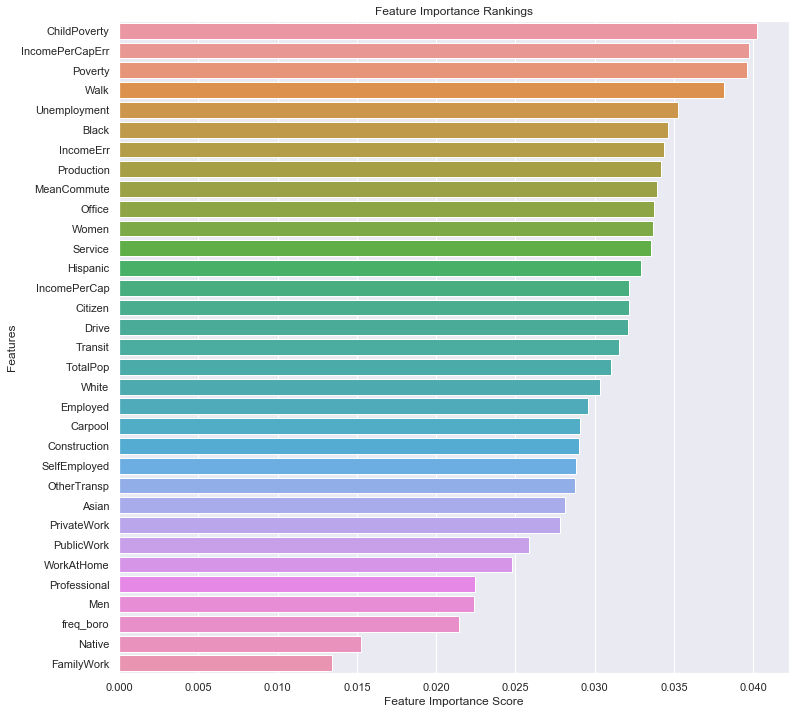

In [115]:
# Creating a bar plot for feature importances

# Firstly creating a Pandas Series to match feature importances values and their indices, also sorting them in decreasing order
feature_importances = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add labels to our graph  
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

In [107]:
clf = SelectFromModel(
            model,              # resulting model
            prefit=True,        # model is already trained
            threshold="median"  # median of importances is the threshold
        )

In [108]:
clf.transform(features)  # selected subset from the original features

array([[5403. , 2659. , 2744. , ..., 2308. ,   80.8,   16.2],
       [5915. , 2896. , 3019. , ..., 2675. ,   71.7,   25.3],
       [5879. , 2558. , 3321. , ..., 2120. ,   75. ,   21.3],
       ...,
       [2550. ,  953. , 1597. , ...,  710. ,   73.8,   21.8],
       [4611. , 2043. , 2568. , ..., 1308. ,   84.7,   12.6],
       [1131. ,  597. ,  534. , ...,  534. ,   65. ,   31.1]])

In [186]:
pred_dtree = model.predict(features)
print("Accuracy of the random forest model: ",metrics.accuracy_score(target, pred_dtree))

Accuracy of the random forest model:  1.0


In [187]:
pred_rf = rf.predict(features)
print("Accuracy of the random forest model: ",metrics.accuracy_score(target, pred_rf))

Accuracy of the random forest model:  0.9976201808662541


Accuracy of decision-tree model is really high (almost perfect). That's why it is the best machine learning model to represent our data.